# ORIE 4580/5580/5581 Assignment 5

#### Students: Yik Hau Au (ya293) and Dionisius Davido Tjajono (dt565)

### Github link: [link](https://github.com/restinghouse0203/Academic_Project/blob/main/Simluation/ORIE5580_Cornell/script/HW5.ipynb)


### Instructions


* Due Thursday, November 6, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 8 (all parts) and 9 (up to Section 9.2 for the midterm) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [1]:
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import random
from google.colab import files
import io
from math import log10
import math


<hr><hr>

# Question 1: Red-Tailed Hawks! (15 points)

(Dedicated to [Big Red and Arthur](https://www.youtube.com/watch?v=diIn5tc8AJo), and their amazing family!)

A School of Ornithology researcher wants to estimate the number of red-tailed hawks in Ithaca. She radio tags 10 birds, and then sets up a feeding station with automatic camera.

The researcher believes that each individual bird's visits to the feeder can be modeled as a *Poisson process* with some unknown rate $\lambda$; we will talk more about the Poisson process in detail later in the semester (for a quick refresher, see Section 2.9.4 of Ross), but for this question, the main thing you need to know is that this is a process that counts a discrete number of arrivals, where the *inter-arrival* between one arrival and the next is independent and identically distributed as an Exponential$(\lambda)$ random variable (similar to the trains in question 5b in the previous assignment).

**(a)**
Over the first five weeks, the researcher observes an average of 28.8 birds (tagged and untagged) visiting the feeder, with an average of 6 tagged birds per week. Use the method of moments to obtain an estimate for the total population.

<hr>

## Ans.


Define P to be the total population, \
$\hat{m_1}=10/P=6/28.8$ \
$P = 288/6 = 48$

<hr>

**(b)** Next, the researcher develops a video processing program which can identify and distinguish different individual birds from their pictures. Using this, over the next week, she observes 20 unique birds visiting the feeding station, out of which 4 are tagged. What is the MLE for the size of the hawk population in Ithaca?

<hr>

## Ans.



Define T as the number of tagged, U as the number of untagged, the population P=T+U, t as the number of tagged bird observed and u as the number of untagged bird observed. The likelihood function is
$$
L(P) = P(N=t, P-T=u) = \frac{\begin{pmatrix}T \\ t\end{pmatrix} \begin{pmatrix}P-T \\ u\end{pmatrix}}{\begin{pmatrix}P \\ t+u\end{pmatrix}} = \frac{\begin{pmatrix}10 \\ 4\end{pmatrix} \begin{pmatrix}P-10 \\ 16\end{pmatrix}}{\begin{pmatrix}P \\ 20\end{pmatrix}}
$$

We consider the ratio of consecutive likelihoods to determine where $L(P)$ peaks:

$$
\frac{L(P+1)}{L(P)} = \frac{(P - 9)(P - 19)}{(P + 1)(P - 25)}
$$

Set the ratio equal to 1 to find the critical point:

$$
\frac{(P - 9)(P - 19)}{(P + 1)(P - 25)} = 1 \implies (P - 9)(P - 19) = (P + 1)(P - 25)
$$

Expanding both sides:

$$
P^2 - 28P + 171 = P^2 - 24P - 25 \implies -28P + 171 = -24P - 25 \implies -4P = -196 \implies P = 49
$$

<hr><hr>

# Question 2: Soup for Lunch? (15 points)

The folks at the [Temple of Zeus](https://as.cornell.edu/about/temple-of-zeus) have the best soup offerings at Cornell -- however, by the time you are done with Simulation, they often run out of soup. To remedy this, you want to try and understand the demand for soup, so that you can suggest how much they should make. You decide to model the total demand $N$ for soups each day as a geometric random variable with parameter $p$ (i.e., $P(N = k) = (1-p)^kp$, $k \ge 0$).

The Temple of Zeus manager gives you data for the number of lunches sold in the last $100$ days. One problem though is that the data is *censored*: the staff prepared soup for at most $40$ servings each day, and as a result, the number of sales each day is between 0 and 40. As a result, on days when the number of soups sold is $40$, you cannot be sure what the true demand $N_i$ was (but you know $N_i\geq 40$); on other days, the number of soups sold is the true demand $N_i<40$.

<hr>

**(a)**
What is the probability mass function of the per-day sales $Y$ in terms of $p$?

<hr>

## Ans.


- If $y_i < 40$: $P(Y = y_i) = p (1-p)^{y_i}$
- If $y_i = 40$: $P(Y = 40) = P(N \geq 40) = \sum_{k=40}^\infty (1-p)^{k}p = (1-p)^{40}p \sum_{k=0}^\infty (1-p) = (1-p)^{40}$


<hr>

**(b)** Compute a maximum likelihood estimator of $p$ based on the sales data for soup given in `Soup_sales_data.csv`.

<hr>

## Ans.


Condier the right censored log-likelihood function, \
$l(p)=\sum_{k=0}^nlog(f(y_i|p))$, where $f(y_i|p)$ is defined as:

- If $y_i < 40$: $P(Y = y_i \mid p) = p (1-p)^{y_i}$
- If $y_i = 40$: $P(Y = 40 \mid p) = P(N \geq 40 \mid p) = (1-p)^{40}$

The likelihood function based on the observed data is:

$$
L(p) = \prod_{i=1}^{100} P(Y = y_i \mid p) = \prod_{\{i : y_i < 40\}} p (1-p)^{y_i} * \prod_{\{i : y_i = 40\}} (1-p)^{40}
$$

Let $n_u = |\{i : y_i < 40\}|$ be the number of uncensored days, $n_c = 100 - n_u$ be the number of censored days, and define the effective sum $s = \sum_{\{i : y_i < 40\}} y_i + 40 n_c$. Then,

$$
L(p) = p^{n_u} (1-p)^s.
$$

The log-likelihood is:

$$
\ell(p) = \log L(p) = n_u \log p + s \log(1-p).
$$

To find the maximum likelihood estimator $\hat{p}$, take the derivative with respect to $p$ and set it to zero:

$$
\frac{d\ell}{dp} = \frac{n_u}{p} - \frac{s}{1-p} = 0 \implies \frac{n_u}{p} = \frac{s}{1-p} \implies n_u (1-p) = s p \implies n_u - n_u p = s p \implies n_u = p (n_u + s).
$$

Solving for $p$ gives:

$$
\hat{p} = \frac{n_u}{n_u + s}.
$$

In [2]:
# Upload the CSV file
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load the data
data = pd.read_csv(io.BytesIO(uploaded[filename]))
y = data.iloc[:, 1].values
n = len(y)

Saving Soup_sales_data.csv to Soup_sales_data.csv


In [3]:
# Compute uncensored count and effective sum
uncensored_mask = y < 40
n_u = np.sum(uncensored_mask) # number of uncensored observations
n_c = n - n_u
s = np.sum(y[uncensored_mask]) + 40 * n_c

# MLE
if n_u == 0:
    p_hat = 0.0
else:
    p_hat = n_u / (n_u + s)

# Output results
print(f"\nNumber of uncensored days (y < 40): {n_u}")
print(f"Number of censored days (y = 40): {n_c}")
print(f"Effective sum s: {s}")
print(f"\nMLE of p: {p_hat:.4f}")


Number of uncensored days (y < 40): 66
Number of censored days (y = 40): 34
Effective sum s: 2397

MLE of p: 0.0268


<hr><hr>

# Question 3: The Birthday Paradox (40 pts)

In this question, we investigate the celebrated [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem)!

<hr>

**(a)** The basic question you may have seen in earlier probability courses is the following: given a party of $n$ people whose birthdays are drawn uniformly over the $365$ days in the year, what is the probability that at least two people share a birthday. Derive an expression for the probability, and plot it for $n\in\{10,11,12,\ldots,49,50\}$.

<hr>

## Ans.

P("At lease two people share the same birthday")=1-P("no one share the same birthday")=
$$
1-\frac{\prod_{i=0}^{n-1}365-i}{365^n}
$$

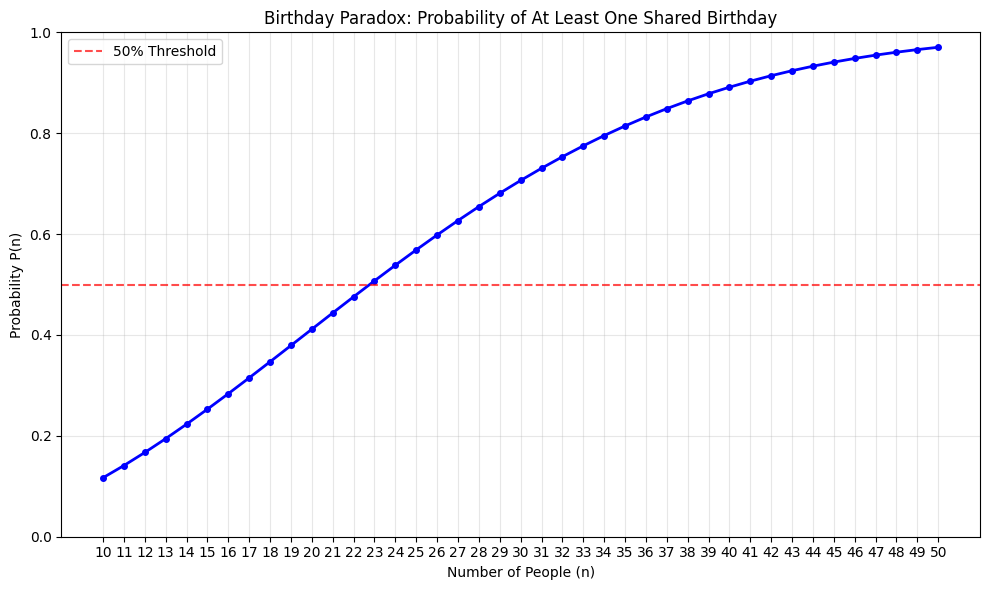

Selected P(n) values:
n=10: P(n) ≈ 0.1169
n=20: P(n) ≈ 0.4114
n=23: P(n) ≈ 0.5073
n=30: P(n) ≈ 0.7063
n=40: P(n) ≈ 0.8912
n=50: P(n) ≈ 0.9704


In [4]:
def bday_paradox_prob(n):
  q = 1.0
  for k in range(1, n):
      q *= (365 - k) / 365
  return 1.0 - q

# Generate n values from 10 to 50
n_values = np.arange(10, 51)
p_values = [bday_paradox_prob(n) for n in n_values]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(n_values, p_values, marker='o', linestyle='-', color='b', linewidth=2, markersize=4)
plt.title('Birthday Paradox: Probability of At Least One Shared Birthday')
plt.xlabel('Number of People (n)')
plt.ylabel('Probability P(n)')
plt.grid(True, alpha=0.3)
plt.xticks(n_values)  # Show all integer ticks from 10 to 50
plt.ylim(0, 1)
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='50% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

print("Selected P(n) values:")
for n in [10, 20, 23, 30, 40, 50]:
    print(f"n={n}: P(n) ≈ {bday_paradox_prob(n):.4f}")

<hr>

**(b)** Next, we want to obtain the above probabilities by simulation. For a given $n$, perform simulations so as to estimate the probability  of at least two people sharing birthdays in a group of $n$, for $n\in\{15,16,\ldots,30\}$, up to $2$ decimal places (with $95\%$ confidence). Plot the estimates and $95\%$ CI, and also plot the theoretical result from part $(a)$ in the same plot.

<hr>

## Ans.

In [5]:
def bday_matching_genator(n):
  bday = [random.randint(1,365) for _ in range(n)]
  return len(bday) != len(set(bday)) # return True if there is duplicate

n=15: Simulated P(n) ≈ 0.27 (95% CI: [0.24, 0.30])
n=16: Simulated P(n) ≈ 0.27 (95% CI: [0.24, 0.30])
n=17: Simulated P(n) ≈ 0.34 (95% CI: [0.31, 0.37])
n=18: Simulated P(n) ≈ 0.35 (95% CI: [0.32, 0.38])
n=19: Simulated P(n) ≈ 0.37 (95% CI: [0.34, 0.40])
n=20: Simulated P(n) ≈ 0.40 (95% CI: [0.37, 0.43])
n=21: Simulated P(n) ≈ 0.42 (95% CI: [0.39, 0.45])
n=22: Simulated P(n) ≈ 0.48 (95% CI: [0.45, 0.51])
n=23: Simulated P(n) ≈ 0.53 (95% CI: [0.50, 0.56])
n=24: Simulated P(n) ≈ 0.50 (95% CI: [0.47, 0.53])
n=25: Simulated P(n) ≈ 0.56 (95% CI: [0.53, 0.60])
n=26: Simulated P(n) ≈ 0.61 (95% CI: [0.58, 0.64])
n=27: Simulated P(n) ≈ 0.63 (95% CI: [0.60, 0.66])
n=28: Simulated P(n) ≈ 0.67 (95% CI: [0.64, 0.69])
n=29: Simulated P(n) ≈ 0.68 (95% CI: [0.65, 0.71])
n=30: Simulated P(n) ≈ 0.69 (95% CI: [0.67, 0.72])


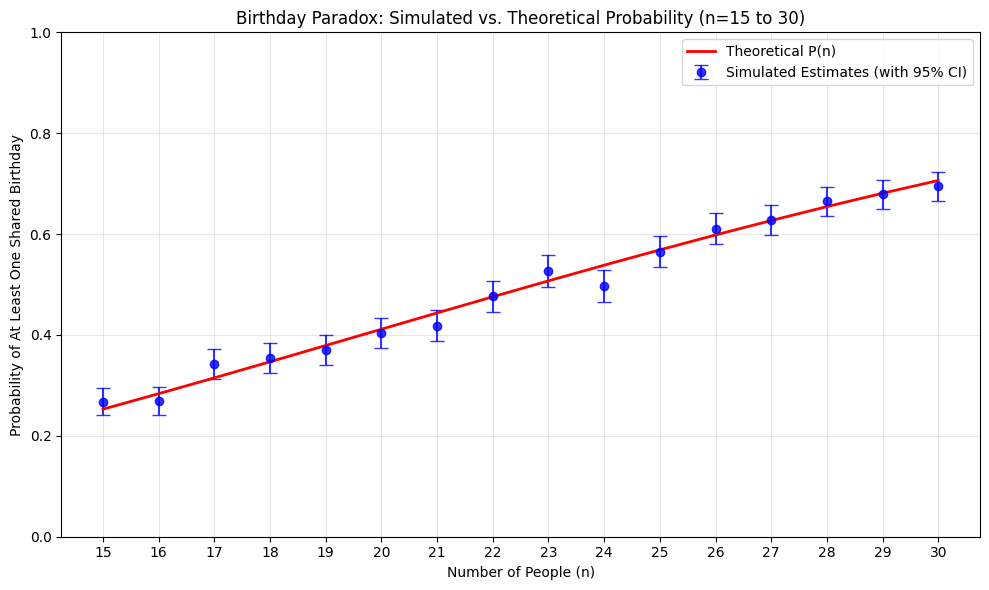

In [6]:
np.random.seed(42)
S = 1000
N = np.arange(15,31)
sim_p = []
sim_se=[]
for i in N:
  simulation_list = [bday_matching_genator(i) for _ in range(S)]
  simulation_array = np.array(simulation_list, dtype=float)
  hat_p = np.mean(simulation_array)
  se = np.sqrt(hat_p*(1-hat_p)/S)
  sim_p.append(hat_p)
  sim_se.append(se)
  print(f"n={i}: Simulated P(n) ≈ {hat_p:.2f} (95% CI: [{hat_p - 1.96*se:.2f}, {hat_p + 1.96*se:.2f}])")

# Theoretical probabilities for comparison
theo_p = [bday_paradox_prob(n) for n in N]

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(N, sim_p, yerr=1.96 * np.array(sim_se), fmt='o',
             color='blue', capsize=5, label='Simulated Estimates (with 95% CI)', alpha=0.8)
plt.plot(N, theo_p, 'r-', linewidth=2, label='Theoretical P(n)')
plt.title('Birthday Paradox: Simulated vs. Theoretical Probability (n=15 to 30)')
plt.xlabel('Number of People (n)')
plt.ylabel('Probability of At Least One Shared Birthday')
plt.grid(True, alpha=0.3)
plt.xticks(N)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

<hr>

**(c)** One flaw in our analysis is that birth-dates may not be uniformly distributed throughout the year. To check this, we can look at data of real birth-dates.

The file `bdaydata.txt` has a list of $365$ days in the year (excluding February $29$) and the corresponding number of birthdays on that date. Load the dataset and plot the following:

i. Empirical histogram of the data

ii. Empirical cdf

iii. Q-Q plot comparing the data to a uniform distribution

(Dataset based on life insurance data from 1981-94; data and example courtesy [Roy Murphy](http://www.panix.com/~murphy/bday.html).)

<hr>

In [7]:
def plot_empirical_histogram(births, total_births=None):
    """
    Plot empirical histogram of birthday frequencies.
    """
    if total_births is None:
        total_births = np.sum(births)

    plt.figure(figsize=(10, 6))
    bins = np.arange(0, max(births) + 2) - 0.5  # For integer counts
    plt.hist(births, bins=bins, density=True, alpha=0.7, edgecolor='black', color='skyblue')
    plt.axhline(y=1/365, color='red', linestyle='--', label=f'Uniform Expectation (1/365 ≈ {1/365:.4f})')
    plt.title('Empirical Histogram of Birthdays per Day')
    plt.xlabel('Number of Births on a Given Day')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [8]:
def plot_empirical_cdf(births):
    """
    Plot empirical cumulative distribution function.
    """
    # Compute empirical CDF: sort data and cumulative proportion
    sorted_births = np.sort(births)
    cdf = np.arange(1, len(births) + 1) / len(births)

    plt.figure(figsize=(10, 6))
    plt.plot(sorted_births, cdf, 'b-', linewidth=2, label='Empirical CDF')
    # Theoretical uniform CDF would be linear from min to max, but for illustration
    plt.axline(xy1=(min(births), 0), slope=1 / (max(births) - min(births) + 1),
               color='red', linestyle='--', label='Uniform Reference')
    plt.title('Empirical CDF of Birthdays per Day')
    plt.xlabel('Number of Births on a Given Day')
    plt.ylabel('Cumulative Probability')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

In [9]:
def plot_qq_uniform(births):
    """
    Q-Q plot: Compare empirical quantiles to uniform(0,1) theoretical quantiles.
    For uniformity test, we use the normalized ranks (proportions).
    """
    # For Q-Q vs uniform: use sorted normalized values or ranks
    # Normalize births to [0,1] scale for comparison to uniform(0,1)
    normalized = (births - min(births)) / (max(births) - min(births))

    # Theoretical uniform quantiles
    n = len(normalized)
    theo_quantiles = np.arange(1/(n+1), n/(n+1), 1/(n+1))  # Avoid 0 and 1

    # Empirical quantiles (sorted normalized)
    emp_quantiles = np.sort(normalized)[1:-1]  # Trim ends to match

    # Adjust lengths if needed
    min_len = min(len(emp_quantiles), len(theo_quantiles))
    emp_quantiles = emp_quantiles[:min_len]
    theo_quantiles = theo_quantiles[:min_len]

    plt.figure(figsize=(10, 6))
    plt.plot(theo_quantiles, emp_quantiles, 'bo', markersize=4, label='Data Points')
    min_val, max_val = 0, 1
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Uniform Reference (y=x)')
    plt.title('Q-Q Plot: Birthday Data vs. Uniform(0,1) Distribution')
    plt.xlabel('Theoretical Uniform Quantiles')
    plt.ylabel('Empirical Quantiles (Normalized)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.axis('square')  # Equal aspect ratio
    plt.xlim(min_val - 0.05, max_val + 0.05)
    plt.ylim(min_val - 0.05, max_val + 0.05)
    plt.show()

In [10]:
# load the data
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load the data
with open(filename, 'r') as f:
  lines = f.readlines()

births = [line.strip().split()[1] for line in lines]
births.pop(0)
births = np.array(births)
n = len(births)
print(n)

Saving bdaydata.txt to bdaydata.txt
365


In [11]:
## dio's hist
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load the data
data = pd.read_csv(io.BytesIO(uploaded[filename]))

data[['date', 'count']] = data['date count'].str.split(' ', expand=True)
data = data.drop(columns=['date count'])

Saving bdaydata.txt to bdaydata (1).txt


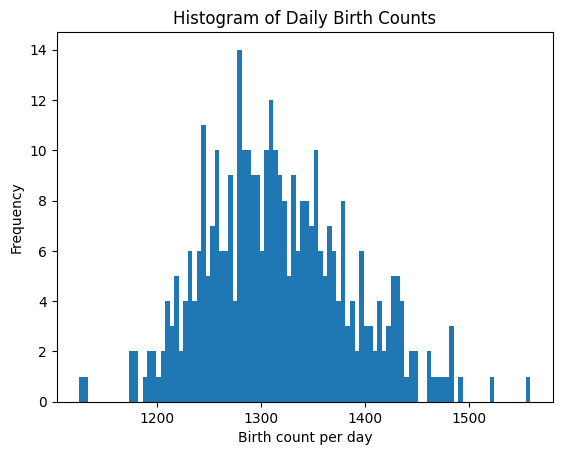

In [12]:
plt.hist(data['count'].astype(int), bins=100)
plt.xlabel('Birth count per day')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Birth Counts')
plt.show()

Loaded data: 365 days, total births = 480715
Mean births per day: 1317.03
Min/Max births per day: 1126 / 1559


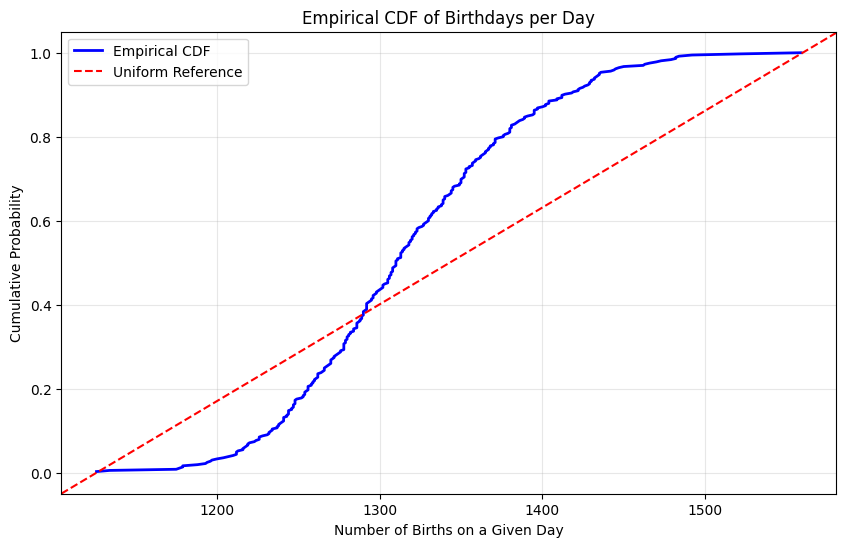

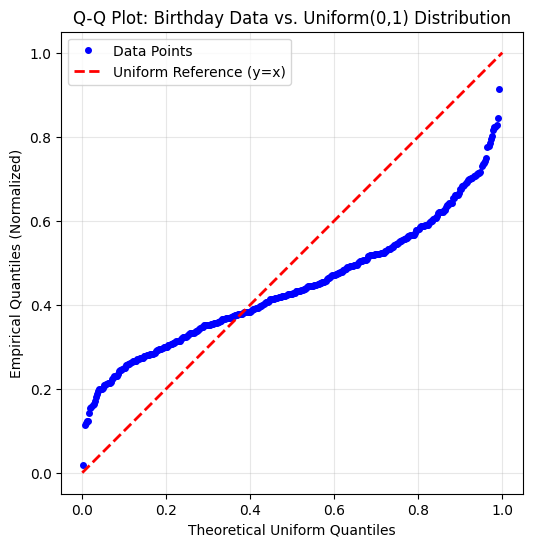

In [28]:
## Plot histogram
births = births.astype(int)
total_births = np.sum(births)
print(f"Loaded data: {len(births)} days, total births = {total_births}")
print(f"Mean births per day: {np.mean(births):.2f}")
print(f"Min/Max births per day: {np.min(births)} / {np.max(births)}")

# Plot i: Empirical histogram
#plot_empirical_histogram(births, total_births)

# Plot ii: Empirical CDF
plot_empirical_cdf(births)

# Plot iii: Q-Q plot vs uniform
plot_qq_uniform(births)


Conclusion:
The birth data doesn't seems to be uniformly distributed

## Ans.

<hr>

**(d)** Perform a Chi-square Test **and** a Kolmogorov-Smirnov Test to study how well the data is modeled by a uniform distribution.

<hr>

## Ans.


In [14]:
## Chi-square test
expected = total_births / 365
chi2_stat = np.sum((births - expected)**2 / expected)
p_value = sc.chi2.sf(chi2_stat, 364)  # df = 365-1
print(f"\nUniformity Check (Chi-square test):")
print(f"Chi2 statistic = {chi2_stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Reject uniformity (p < 0.05): Birthdays are not uniformly distributed.")
else:
    print("Cannot reject uniformity (p >= 0.05).")


Uniformity Check (Chi-square test):
Chi2 statistic = 1352.72, p-value = 0.0000
Reject uniformity (p < 0.05): Birthdays are not uniformly distributed.


In [15]:
## K-S test
total_births = np.sum(births)
expected_per_day = total_births / 365

# Empirical CDF: cumulative proportion of births
# For KS, compare observed cumulative distribution to uniform
sorted_cumulative = np.cumsum(births) / total_births  # Empirical CDF at each day

# Theoretical uniform CDF: should be linear from 0 to 1 over 365 days
# For discrete uniform, CDF at day k is k/365
theo_cdf = np.arange(1, 366) / 365.0

# KS test: max difference between empirical and theoretical CDFs
# Adjust for discrete: compare at points just after each observation
D_KS = np.max(np.concatenate((np.abs(sorted_cumulative[1:] - theo_cdf[:-1]), np.abs(sorted_cumulative - theo_cdf)), axis=0))
print(D_KS)
kstest_result = sc.kstest(births, 'uniform')
D_KS = kstest_result.statistic
p_value = kstest_result.pvalue

print("Kolmogorov-Smirnov Test for Uniformity:")
print(f"KS Statistic (D) = {D_KS:.4f}")
print(f"p-value = {p_value:.4f}")
print(f"Critical value (alpha=0.05) ≈ {1.36 / np.sqrt(n):.4f}")
if p_value < 0.05:
    print("Reject H0: Birthday distribution is NOT uniform (p < 0.05).")
else:
    print("Fail to reject H0: Birthday distribution appears uniform (p >= 0.05).")

0.012766143582639944
Kolmogorov-Smirnov Test for Uniformity:
KS Statistic (D) = 1.0000
p-value = 0.0000
Critical value (alpha=0.05) ≈ 0.0712
Reject H0: Birthday distribution is NOT uniform (p < 0.05).


<hr>

**(e)** Since you have an extensive dataset of birthday frequency, you can directly use the nonparametric bootstrap to estimate the probability of at least two people sharing birthdays in a group of $n$. Plot the bootstrap estimate and $95\%$ CI for $n\in\{15,16,\ldots,30\}$, and compare against the plot in part $(b)$.

<hr>

## Ans.


In [16]:
def bday_matching_genator(n):
  bday = [random.randint(1,365) for _ in range(n)]
  return len(bday) != len(set(bday)) # return True if there is duplicate

N = np.arange(15,31)
sim_p = []
sim_se=[]
for i in N:
  simulation_list = [bday_matching_genator(i) for _ in range(S)]
  hat_p = np.mean(simulation_list)
  se = np.sqrt(hat_p*(1-hat_p)/S)
  sim_p.append(hat_p)
  sim_se.append(se)
  print(f"n={i}: Simulated P(n) ≈ {hat_p:.2f} (95% CI: [{hat_p - 1.96*se:.2f}, {hat_p + 1.96*se:.2f}])")

# Theoretical probabilities for comparison
theo_p = [bday_paradox_prob(n) for n in N]

n=15: Simulated P(n) ≈ 0.26 (95% CI: [0.23, 0.29])
n=16: Simulated P(n) ≈ 0.27 (95% CI: [0.25, 0.30])
n=17: Simulated P(n) ≈ 0.33 (95% CI: [0.30, 0.36])
n=18: Simulated P(n) ≈ 0.35 (95% CI: [0.32, 0.38])
n=19: Simulated P(n) ≈ 0.37 (95% CI: [0.34, 0.40])
n=20: Simulated P(n) ≈ 0.42 (95% CI: [0.39, 0.45])
n=21: Simulated P(n) ≈ 0.46 (95% CI: [0.43, 0.49])
n=22: Simulated P(n) ≈ 0.50 (95% CI: [0.47, 0.53])
n=23: Simulated P(n) ≈ 0.51 (95% CI: [0.48, 0.54])
n=24: Simulated P(n) ≈ 0.54 (95% CI: [0.51, 0.57])
n=25: Simulated P(n) ≈ 0.57 (95% CI: [0.54, 0.60])
n=26: Simulated P(n) ≈ 0.58 (95% CI: [0.55, 0.61])
n=27: Simulated P(n) ≈ 0.63 (95% CI: [0.60, 0.66])
n=28: Simulated P(n) ≈ 0.63 (95% CI: [0.60, 0.66])
n=29: Simulated P(n) ≈ 0.71 (95% CI: [0.69, 0.74])
n=30: Simulated P(n) ≈ 0.67 (95% CI: [0.64, 0.70])


In [17]:
# Dio's part e

total = np.sum(data['count'].astype(int))
data['pmf'] = data['count'].astype(int)/total
data['cdf'] = np.cumsum(data['pmf'])
data
def bootstrap(population):
  res = []
  for i in range(population):
    rnd = np.random.uniform()
    row = data[data['cdf'] >= rnd].iloc[0]
    res.append(row['date'])
  if len(res) != len(set(res)):
    return 1
  else:
    return 0

np.random.seed(42)
S = 1000
N = np.arange(15,31)
sim_p = []
sim_se=[]
sim_bootstrap = []
sim_se_bootstrap = []
for i in N:
  simulation_list = [bday_matching_genator(i) for _ in range(S)]
  sim_bootstrap_list = [bootstrap(i) for _ in range(S)]
  simulation_array = np.array(simulation_list, dtype=float)
  hat_p = np.mean(simulation_array)
  hat_p_bootstrap = np.mean(sim_bootstrap_list)
  se_bootstrap = np.sqrt(hat_p_bootstrap*(1-hat_p_bootstrap)/S)
  se = np.sqrt(hat_p*(1-hat_p)/S)
  sim_p.append(hat_p)
  sim_se.append(se)
  sim_se_bootstrap.append(se_bootstrap)
  sim_bootstrap.append(hat_p_bootstrap)
  print(f"n={i}: Simulated P(n) ≈ {hat_p:.2f} (95% CI: [{hat_p - 1.96*se:.2f}, {hat_p + 1.96*se:.2f}])")
  print(f"n={i}: Simulated P(n)_boots ≈ {hat_p_bootstrap:.2f} (95% CI: [{hat_p_bootstrap - 1.96*se_bootstrap:.2f}, {hat_p_bootstrap + 1.96*se_bootstrap:.2f}])")

# Theoretical probabilities for comparison
theo_p = [bday_paradox_prob(n) for n in N]

n=15: Simulated P(n) ≈ 0.25 (95% CI: [0.23, 0.28])
n=15: Simulated P(n)_boots ≈ 0.28 (95% CI: [0.25, 0.31])
n=16: Simulated P(n) ≈ 0.27 (95% CI: [0.24, 0.29])
n=16: Simulated P(n)_boots ≈ 0.29 (95% CI: [0.26, 0.32])
n=17: Simulated P(n) ≈ 0.31 (95% CI: [0.29, 0.34])
n=17: Simulated P(n)_boots ≈ 0.30 (95% CI: [0.28, 0.33])
n=18: Simulated P(n) ≈ 0.35 (95% CI: [0.32, 0.38])
n=18: Simulated P(n)_boots ≈ 0.37 (95% CI: [0.34, 0.40])
n=19: Simulated P(n) ≈ 0.38 (95% CI: [0.35, 0.41])
n=19: Simulated P(n)_boots ≈ 0.37 (95% CI: [0.34, 0.40])
n=20: Simulated P(n) ≈ 0.43 (95% CI: [0.40, 0.46])
n=20: Simulated P(n)_boots ≈ 0.40 (95% CI: [0.37, 0.43])
n=21: Simulated P(n) ≈ 0.47 (95% CI: [0.44, 0.50])
n=21: Simulated P(n)_boots ≈ 0.47 (95% CI: [0.44, 0.50])
n=22: Simulated P(n) ≈ 0.48 (95% CI: [0.45, 0.51])
n=22: Simulated P(n)_boots ≈ 0.47 (95% CI: [0.44, 0.51])
n=23: Simulated P(n) ≈ 0.51 (95% CI: [0.48, 0.54])
n=23: Simulated P(n)_boots ≈ 0.52 (95% CI: [0.49, 0.55])
n=24: Simulated P(n) ≈ 0.55 

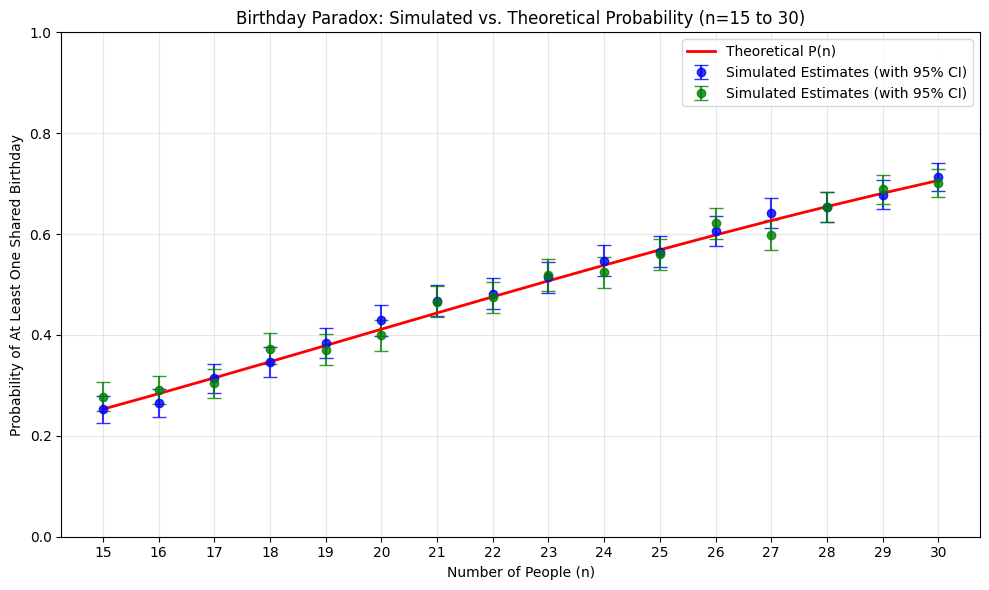

In [18]:
# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(N, sim_p, yerr=1.96 * np.array(sim_se), fmt='o',
             color='blue', capsize=5, label='Simulated Estimates (with 95% CI)', alpha=0.8)
plt.errorbar(N, sim_bootstrap, yerr=1.96 * np.array(sim_se_bootstrap), fmt='o',
             color='green', capsize=5, label='Simulated Estimates (with 95% CI)', alpha=0.8)
plt.plot(N, theo_p, 'r-', linewidth=2, label='Theoretical P(n)')
plt.title('Birthday Paradox: Simulated vs. Theoretical Probability (n=15 to 30)')
plt.xlabel('Number of People (n)')
plt.ylabel('Probability of At Least One Shared Birthday')
plt.grid(True, alpha=0.3)
plt.xticks(N)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

<hr><hr>

# Question 4: Benford's Law (30 pts)

In this question, we will use the Chi-square test to study *Benford's law* in a variety of setttings. Consider a data set consisting of $n$ different numbers, and look at the leading digit of each number (for example, the leading digit of $123.456$ is $1$, and the leading digit of $-0.423$ is $4$). For many data sets, the fraction of leading digits that equal $1$ is much higher than $1/9$ (i.e., what it would be if uniformlly distributed); in fact, the probability distribution of the different leading digits $1, 2, \ldots, 9$ is far from uniform.

This observation has been observed to hold in measurements of distances to galaxies, numbers appearing in tax forms and many other settings, and has been used to detect fraud among other uses. See [the Wikipedia page](https://en.wikipedia.org/wiki/Benford\%27s_law) for a description of this phenomena, and [this blog post](https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/) for an interesting related discussion. More recently, this has also been (supposedly) misused in (supposedly) detecting (supposed) fraud in election results -- see [this Stand-Up Maths](https://www.youtube.com/watch?v=etx0k1nLn78&t=4s) video for a great example of how data analysis should be done!



<hr>

**(a)** First, we will study this phenomena in a *synthetic* dataset. For this, compute the first digits of $n!$ for the first $1500$ integers, and plot their empirical histogram. You can use the code fragment provided to generate the first $n$ factorials, or write your own.

<hr>

## Ans.

In [19]:

def get_leading_digit(n):
    """Get the leading digit of a number n."""
    if n == 0:
        return 0
    # Use log10 to get the fractional part for leading digit
    log_val = log10(n)
    fractional_part = log_val - math.floor(log_val)
    leading_digit = int(10 ** fractional_part)
    return leading_digit

In [20]:
def compute_factorial_leading_digits(n_max):
    """Compute leading digits for first n_max factorials."""
    leading_digits = []

    # Start with 0! = 1
    current_factorial = 1
    leading_digits.append(get_leading_digit(current_factorial))

    # Compute factorials iteratively using log to avoid overflow
    current_log = 0.0  # log10(1) = 0

    for i in range(1, n_max + 1):
        # Add log10(i) to current_log
        current_log += log10(i)
        # Get leading digit from current_log
        fractional_part = current_log - math.floor(current_log)
        leading_digit = int(10 ** fractional_part)
        leading_digits.append(leading_digit)

    return leading_digits

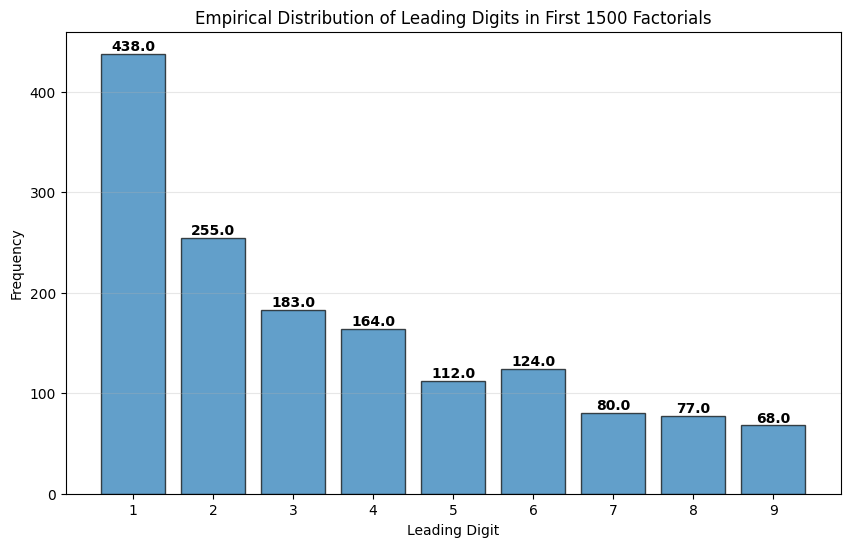

Total numbers analyzed: 1501

Frequency of each leading digit:
Digit 1: 438 times (29.18%)
Digit 2: 255 times (16.99%)
Digit 3: 183 times (12.19%)
Digit 4: 164 times (10.93%)
Digit 5: 112 times (7.46%)
Digit 6: 124 times (8.26%)
Digit 7: 80 times (5.33%)
Digit 8: 77 times (5.13%)
Digit 9: 68 times (4.53%)


In [21]:
# Compute leading digits for first 1500 factorials
n_max = 1500
leading_digits = compute_factorial_leading_digits(n_max)

# Filter out 0 (only for 0! if we included it, but we start from 1)
leading_digits = [d for d in leading_digits if d != 0]

# Create histogram
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(leading_digits, bins=range(1, 11),
                          align='left', rwidth=0.8,
                          edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.title(f'Empirical Distribution of Leading Digits in First {n_max} Factorials')
plt.xticks(range(1, 10))

# Add frequency labels on bars
for i, count in enumerate(counts):
    plt.text(i + 1, count + 0.5, str(count),
             ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.show()

# Print summary statistics
print(f"Total numbers analyzed: {len(leading_digits)}")
print("\nFrequency of each leading digit:")
for digit in range(1, 10):
    freq = leading_digits.count(digit)
    percentage = (freq / len(leading_digits)) * 100
    print(f"Digit {digit}: {freq} times ({percentage:.2f}%)")

<hr>

**(b)** Use a Chi-square test to determine how well the data can be modeled using a uniform distribution.

<hr>

## Ans.

In [29]:
# Compute leading digits for first 1500 factorials
n_max = 1500
X = compute_factorial_leading_digits(n_max)

# Filter out 0 (shouldn't appear, but just in case)
X = [d for d in X if d != 0 and d >= 1 and d <= 9]

# Calculate the sample size
n = np.size(X)
print(f"Sample size n = {n}")

# For uniform distribution over digits 1-9, we have exactly 9 categories
# No need to calculate k from minimum expected frequency since we have fixed bins
k = 9  # Digits 1 through 9
print(f"Number of categories k = {k}")

# Under uniform distribution, expected frequency for each digit is n/k
expected_freq = n / k
print(f"Expected frequency per digit = {expected_freq:.2f}")

# Check if expected frequency is adequate (usually >5 for chi-square approximation)
if expected_freq < 5:
    print("Warning: Expected frequency is low. Chi-square approximation may not be reliable.")
else:
    print("Expected frequency is adequate for chi-square test.")

# Compute observed frequencies for each digit 1-9
observed = np.zeros(k)
for i in range(k):
    digit = i + 1
    observed[i] = X.count(digit)

print("\nObserved frequencies:")
for i in range(k):
    print(f"Digit {i+1}: {observed[i]:.0f}")

print(f"\nExpected frequencies: {expected_freq:.2f} for each of 9 digits")

# Calculate the chi-squared test statistic manually (following the example format)
D_2 = np.sum((observed - expected_freq)**2 / expected_freq)
print(f"\nThe Chi-Square Test statistic is D^2 = {D_2:.4f}")

# Degrees of freedom for goodness-of-fit test with uniform distribution
df = k - 1  # No parameters estimated from data for uniform distribution
print(f"Degrees of freedom df = {df}")

# Using scipy.stats.chisquare for p-value and confirmation
chi2_stat, p_value = sc.chisquare(observed, expected_freq)
print(f"\nUsing scipy.stats.chisquare:")
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"p-value: {p_value:.6f}")

# Interpretation
alpha = 0.05  # Common significance level
if p_value < alpha:
    print(f"\nAt significance level α = {alpha}, we REJECT the null hypothesis.")
    print("The leading digits do NOT follow a uniform distribution.")
    print("This is consistent with Benford's law, which predicts a non-uniform distribution.")
else:
    print(f"\nAt significance level α = {alpha}, we FAIL TO REJECT the null hypothesis.")
    print("The leading digits appear to follow a uniform distribution.")

Sample size n = 1501
Number of categories k = 9
Expected frequency per digit = 166.78
Expected frequency is adequate for chi-square test.

Observed frequencies:
Digit 1: 438
Digit 2: 255
Digit 3: 183
Digit 4: 164
Digit 5: 112
Digit 6: 124
Digit 7: 80
Digit 8: 77
Digit 9: 68

Expected frequencies: 166.78 for each of 9 digits

The Chi-Square Test statistic is D^2 = 670.3145
Degrees of freedom df = 8

Using scipy.stats.chisquare:
Chi-square statistic: 670.3145
p-value: 0.000000

At significance level α = 0.05, we REJECT the null hypothesis.
The leading digits do NOT follow a uniform distribution.
This is consistent with Benford's law, which predicts a non-uniform distribution.


<hr>

**(c)** Next, use a Chi-square test to test how well the data is modeled using the 'Benford's Law' distribution:
$$p(d)= \log _{10}(d+1)-\log _{10}(d), \quad d\in\{1,2,\ldots,9\}$$


<hr>

In [31]:
# Compute leading digits for first 1500 factorials
n_max = 1500
X = compute_factorial_leading_digits(n_max)

# Filter out 0 (shouldn't appear, but just in case)
X = [d for d in X if d != 0 and d >= 1 and d <= 9]

# Calculate the sample size
n = np.size(X)
print(f"Sample size n = {n}")

# For uniform distribution over digits 1-9, we have exactly 9 categories
# No need to calculate k from minimum expected frequency since we have fixed bins
k = 9  # Digits 1 through 9
print(f"Number of categories k = {k}")

# Under Benford's Law distribution
benford_probs = np.array([np.log10(1 + 1/d) for d in range(1, 10)])
benford_expected = n * benford_probs

print("Benford's law expected frequencies:")
for i in range(k):
    print(f"Digit {i+1}: {benford_expected[i]:.2f} ({benford_probs[i]*100:.2f}%)")

# Chi-square test against Benford's law
chi2_benford, p_benford = sc.chisquare(observed, benford_expected)
print(f"\nChi-square test against Benford's law:")
print(f"Chi-square statistic: {chi2_benford:.4f}")
print(f"p-value: {p_benford:.6f}")

if p_benford > alpha:
    print(f"\nThe data fits Benford's law well (p = {p_benford:.4f} > {alpha}).")
else:
    print(f"\nThe data does not perfectly fit Benford's law (p = {p_benford:.4f} < {alpha}).")

# Interpretation
alpha = 0.05  # Common significance level
if p_benford < alpha:
    print(f"\nAt significance level α = {alpha}, we REJECT the null hypothesis.")
    print("The leading digits do NOT follow a uniform distribution.")
    print("This is inconsistent with Benford's law, which predicts a uniform distribution.")
else:
    print(f"\nAt significance level α = {alpha}, we FAIL TO REJECT the null hypothesis.")
    print("The leading digits appear to follow a non-uniform distribution.")

Sample size n = 1501
Number of categories k = 9
Benford's law expected frequencies:
Digit 1: 451.85 (30.10%)
Digit 2: 264.31 (17.61%)
Digit 3: 187.53 (12.49%)
Digit 4: 145.46 (9.69%)
Digit 5: 118.85 (7.92%)
Digit 6: 100.49 (6.69%)
Digit 7: 87.05 (5.80%)
Digit 8: 76.78 (5.12%)
Digit 9: 68.68 (4.58%)

Chi-square test against Benford's law:
Chi-square statistic: 9.6989
p-value: 0.286795

The data fits Benford's law well (p = 0.2868 > 0.05).

At significance level α = 0.05, we FAIL TO REJECT the null hypothesis.
The leading digits appear to follow a non-uniform distribution.


<hr>

**(d)** Finally, we will repeat this analysis with a more natural dataset. The dataset `us_pop.csv` contains the US population in 100,000 different zip codes in the year 2010, and the numbers range from less than ten to almost 100,000. As above, compute the histogram of the leading digits, and use the Chi-square test to see how well the data is modeled via the uniform and the Benford's law distributions.

<hr>

## Ans.

In [24]:
# Upload the CSV file
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load the data
pop = pd.read_csv(io.BytesIO(uploaded[filename]))
n = len(pop.iloc[:,0])

Saving us_pop.csv to us_pop.csv



Computed leading digits for 100000 population values


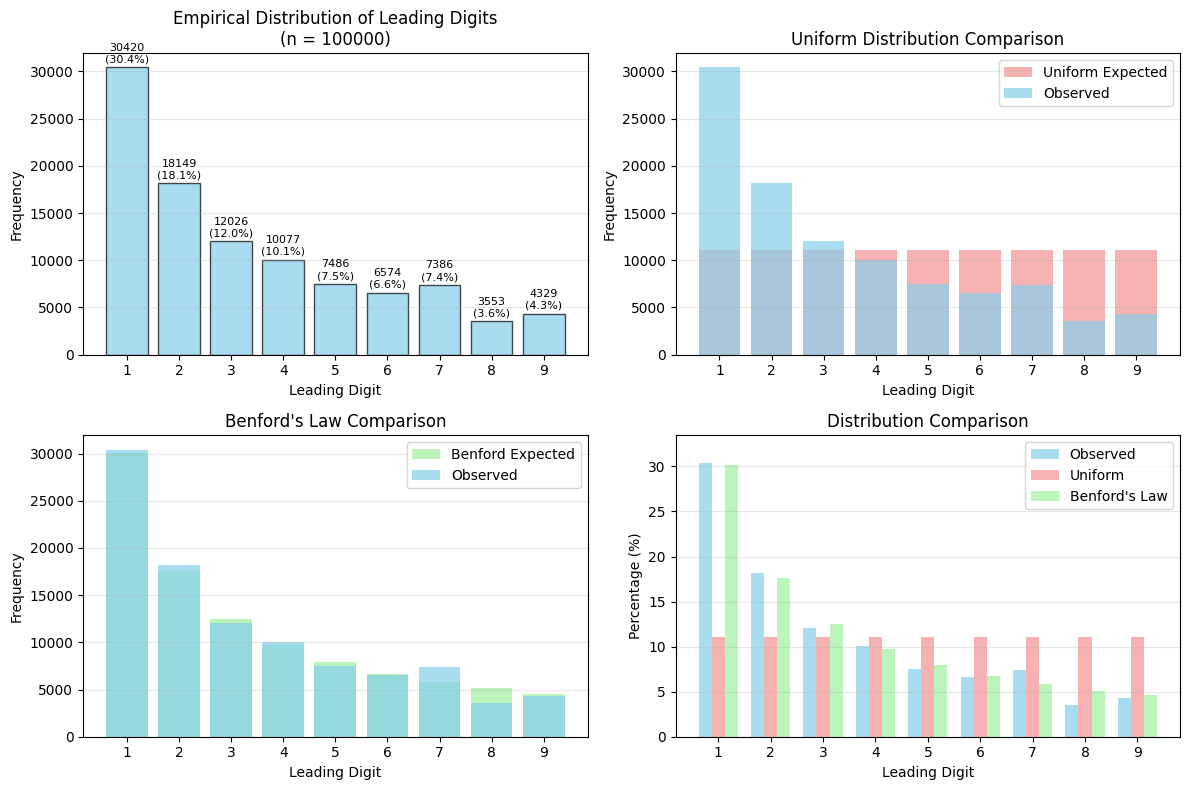

In [25]:
# Extract population data (assuming first column is population)
population = pop.iloc[:, 0].values

# Compute leading digits for all population values
leading_digits = []
for pop_value in population:
    digit = get_leading_digit(pop_value)
    if digit is not None and 1 <= digit <= 9:
        leading_digits.append(digit)

print(f"\nComputed leading digits for {len(leading_digits)} population values")

# Create histogram of leading digits
plt.figure(figsize=(12, 8))

# Plot 1: Empirical histogram
plt.subplot(2, 2, 1)
unique_digits, counts = np.unique(leading_digits, return_counts=True)
plt.bar(unique_digits, counts, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.title(f'Empirical Distribution of Leading Digits\n(n = {len(leading_digits)})')
plt.xticks(range(1, 10))
plt.grid(axis='y', alpha=0.3)

# Add frequency labels
for i, count in enumerate(counts):
    plt.text(unique_digits[i], count + max(counts)*0.01,
             f'{count}\n({count/len(leading_digits)*100:.1f}%)',
             ha='center', va='bottom', fontsize=8)

# Plot 2: Uniform distribution comparison
plt.subplot(2, 2, 2)
uniform_expected = len(leading_digits) / 9 * np.ones(9)
plt.bar(range(1, 10), uniform_expected, color='lightcoral', alpha=0.6, label='Uniform Expected')
plt.bar(unique_digits, counts, color='skyblue', alpha=0.7, label='Observed')
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.title('Uniform Distribution Comparison')
plt.xticks(range(1, 10))
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Plot 3: Benford's law comparison
plt.subplot(2, 2, 3)
benford_probs = np.array([log10(1 + 1/d) for d in range(1, 10)])
benford_expected = len(leading_digits) * benford_probs
plt.bar(range(1, 10), benford_expected, color='lightgreen', alpha=0.6, label='Benford Expected')
plt.bar(unique_digits, counts, color='skyblue', alpha=0.7, label='Observed')
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.title("Benford's Law Comparison")
plt.xticks(range(1, 10))
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Plot 4: Percentage comparison
plt.subplot(2, 2, 4)
observed_pct = counts / len(leading_digits) * 100
uniform_pct = np.ones(9) * (100/9)
benford_pct = benford_probs * 100

x = np.arange(1, 10)
width = 0.25

plt.bar(x - width, observed_pct, width, label='Observed', color='skyblue', alpha=0.7)
plt.bar(x, uniform_pct, width, label='Uniform', color='lightcoral', alpha=0.6)
plt.bar(x + width, benford_pct, width, label="Benford's Law", color='lightgreen', alpha=0.6)

plt.xlabel('Leading Digit')
plt.ylabel('Percentage (%)')
plt.title('Distribution Comparison')
plt.xticks(x)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, max(observed_pct.max(), uniform_pct.max(), benford_pct.max()) * 1.1)

plt.tight_layout()
plt.show()

In [26]:
# Prepare observed frequencies using the corrected leading digits
observed = np.array([leading_digits.count(d) for d in range(1, 10)])
n_valid = len(leading_digits)

print(f"\nSample size: n = {len(leading_digits)}")
print("\nObserved frequencies:")
for i in range(9):
    digit = i + 1
    percentage = (observed[i] / len(leading_digits)) * 100 if len(leading_digits) > 0 else 0
    print(f"Digit {digit}: {observed[i]:.0f} ({percentage:.2f}%)")

# 1. CHI-SQUARE TEST FOR UNIFORM DISTRIBUTION
k = 9  # Number of categories (digits 1-9)
expected_uniform = len(leading_digits) / k
df_uniform = k - 1  # Degrees of freedom (no parameters estimated)

print(f"Expected frequency per digit (uniform): {expected_uniform:.2f}")
print(f"Degrees of freedom: {df_uniform}")

# Check adequacy of expected frequencies
if expected_uniform < 5:
    print("Warning: Expected frequencies are low (<5). Chi-square approximation may be unreliable.")
else:
    print("Expected frequencies are adequate for chi-square test.")

# Calculate chi-square statistic for uniform
chi2_uniform = np.sum((observed - expected_uniform)**2 / expected_uniform)

# Using scipy for p-value
chi2_stat_u, p_value_u = sc.chisquare(observed, expected_uniform)

print(f"\nChi-square statistic: {chi2_stat_u:.4f}")
print(f"p-value: {p_value_u:.6f}")

alpha = 0.05
if p_value_u < alpha:
    print(f"\nRESULT: REJECT null hypothesis (p = {p_value_u:.6f} < {alpha})")
    print("The leading digits do NOT follow a uniform distribution.")
    print("This suggests the population data exhibits Benford's law characteristics.")
else:
    print(f"\nRESULT: Fail to reject null hypothesis (p = {p_value_u:.6f} >= {alpha})")
    print("The leading digits appear consistent with uniform distribution.")


Sample size: n = 100000

Observed frequencies:
Digit 1: 30420 (30.42%)
Digit 2: 18149 (18.15%)
Digit 3: 12026 (12.03%)
Digit 4: 10077 (10.08%)
Digit 5: 7486 (7.49%)
Digit 6: 6574 (6.57%)
Digit 7: 7386 (7.39%)
Digit 8: 3553 (3.55%)
Digit 9: 4329 (4.33%)
Expected frequency per digit (uniform): 11111.11
Degrees of freedom: 8
Expected frequencies are adequate for chi-square test.

Chi-square statistic: 51749.7132
p-value: 0.000000

RESULT: REJECT null hypothesis (p = 0.000000 < 0.05)
The leading digits do NOT follow a uniform distribution.
This suggests the population data exhibits Benford's law characteristics.


In [27]:
# 2. IMPROVED CHI-SQUARE TEST FOR BENFORD'S LAW
# Benford's law probabilities
benford_probs = np.array([log10(1 + 1/d) for d in range(1, 10)])
expected_benford = n_valid * benford_probs

print("Benford's law theoretical distribution:")
for i in range(9):
    digit = i + 1
    prob_pct = benford_probs[i] * 100
    exp_count = expected_benford[i]
    print(f"Digit {digit}: {exp_count:7.1f} ({prob_pct:5.2f}%)")

df_benford = k - 1  # Fixed distribution, no parameters estimated
print(f"\nDegrees of freedom: {df_benford}")

# Check expected frequencies
min_expected = np.min(expected_benford)
max_expected = np.max(expected_benford)
print(f"Expected frequencies range: {min_expected:.1f} to {max_expected:.1f}")

if min_expected < 5:
    print(f"Warning: Minimum expected frequency = {min_expected:.1f} < 5")
else:
    print("All expected frequencies are adequate for chi-square test.")

# Perform chi-square test with better interpretation
chi2_stat_b, p_value_b = sc.chisquare(observed, expected_benford)

print(f"\nChi-square statistic: {chi2_stat_b:.4f}")
print(f"p-value: {p_value_b:.8f}")

# Nuanced interpretation for real data
print(f"\nInterpretation:")
if p_value_b >= 0.05:
    print(f"• Good fit to Benford's law (p = {p_value_b:.6f} >= 0.05)")
elif p_value_b >= 0.01:
    print(f"• Moderate fit with some deviation (p = {p_value_b:.6f})")
else:
    print(f"• Significant deviation from perfect Benford's law (p = {p_value_b:.6f})")

Benford's law theoretical distribution:
Digit 1: 30103.0 (30.10%)
Digit 2: 17609.1 (17.61%)
Digit 3: 12493.9 (12.49%)
Digit 4:  9691.0 ( 9.69%)
Digit 5:  7918.1 ( 7.92%)
Digit 6:  6694.7 ( 6.69%)
Digit 7:  5799.2 ( 5.80%)
Digit 8:  5115.3 ( 5.12%)
Digit 9:  4575.7 ( 4.58%)

Degrees of freedom: 8
Expected frequencies range: 4575.7 to 30103.0
All expected frequencies are adequate for chi-square test.

Chi-square statistic: 1003.1681
p-value: 0.00000000

Interpretation:
• Significant deviation from perfect Benford's law (p = 0.000000)


**(e) (Optional for all students)** To understand how the Benford's law distribution originates, the important idea is that when a random variable $X$ ranges over several orders (say between $0$ and $10^6$), then it is better modelled by saying that $\log_{10}(X)$ is uniformly distributed on interval $[0,6]$ (rather than $X$ being uniform on $[0,10^6]$. Using this, can you derive the the exact probabilities for each of the leading digits.

# Disclaimer
## GenAI is invlolved in generating code for creating plot and formatting LaTeX